In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d_f = pd.read_csv('Book-01.csv')

In [4]:
d_f.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Training Times Last Year',
       'Age', 'CF_attrition count', 'CF_attrition rate', 'CF_current Employee',
       'Daily Rate', 'Distance From Home', 'Education',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [5]:
df = d_f[['Performance Rating','Years At Company','Business Travel']]

In [6]:
d_f['Business Travel'].value_counts()

Business Travel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [7]:
df.head(5)

,Performance Rating,Years At Company,Business Travel
0,3,6,Travel_Rarely
1,4,10,Travel_Frequently
2,3,0,Travel_Rarely
3,3,8,Travel_Frequently
4,3,2,Travel_Rarely


In [8]:
X = df.drop('Business Travel', axis=1)
y = df['Business Travel']

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.preprocessing import LabelEncoder

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
# call the model
model = SVC(kernel='rbf')
# train the model
model.fit(X_train, y_train)
# predict the model
y_pred = model.predict(X_test)

In [12]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0  34]
 [  0   0  39]
 [  0   0 221]]
                   precision    recall  f1-score   support

       Non-Travel       0.00      0.00      0.00        34
Travel_Frequently       0.00      0.00      0.00        39
    Travel_Rarely       0.75      1.00      0.86       221

         accuracy                           0.75       294
        macro avg       0.25      0.33      0.29       294
     weighted avg       0.57      0.75      0.65       294



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


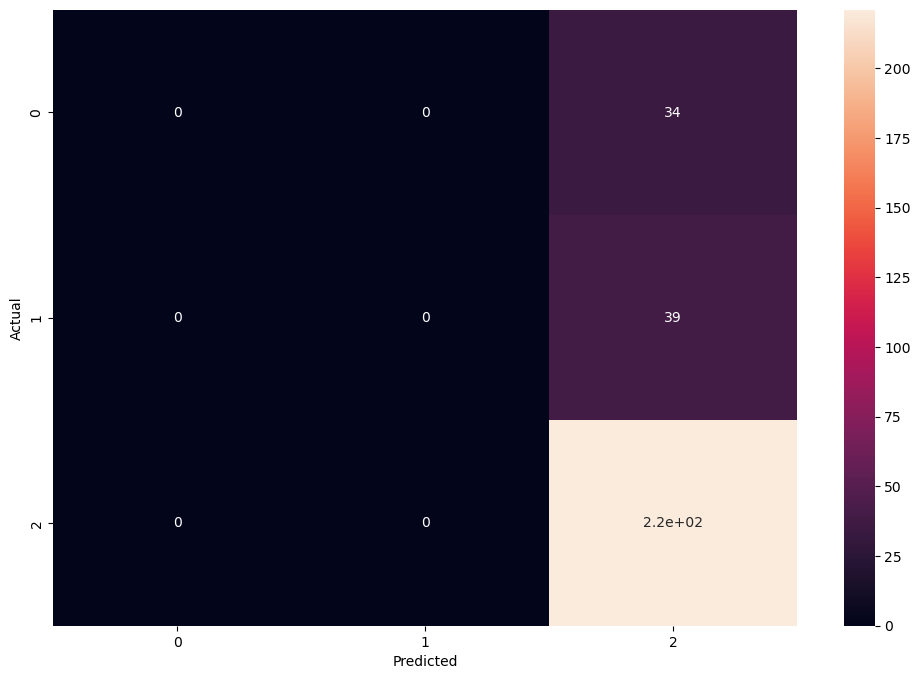

In [13]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Axes: >

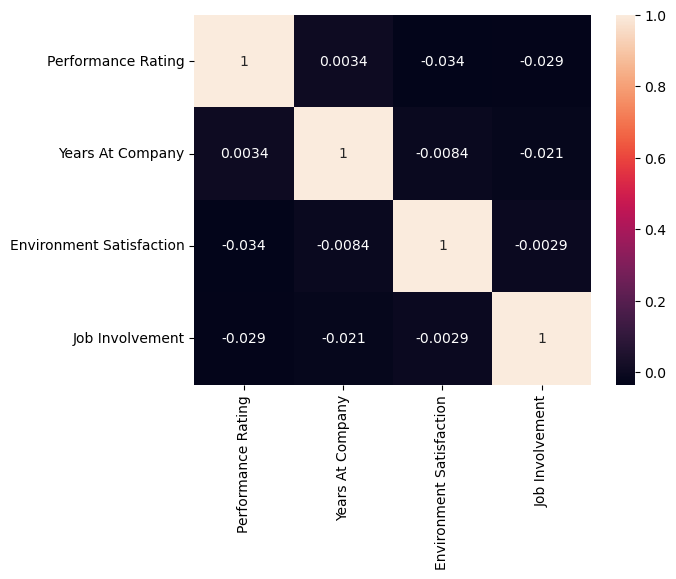

In [14]:
sns.heatmap(d_f[['Performance Rating','Years At Company','Environment Satisfaction','Job Involvement']].corr(),annot=True)

In [15]:
d_f[['Distance From Home','Work Life Balance']].corr()

,Distance From Home,Work Life Balance
Distance From Home,1.000000,-0.026556
Work Life Balance,-0.026556,1.000000
